In [88]:
import pandas as pds
import seaborn as sbn
import numpy as npy
import matplotlib.pyplot as plb

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

data_country = pds.read_csv('Country-data.csv')
data_country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [89]:
data_country.shape

(167, 10)

In [90]:
data_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [91]:
data_country.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [92]:
data_country.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [95]:
data_ = data_country.drop(columns='country')
data_.head(10)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
6,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
9,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840


In [94]:
data_scaled = pds.DataFrame(StandardScaler().fit_transform(data_), columns=data_.columns)
data_scaled.head(10)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
5,-0.591177,-0.812628,0.468966,-1.279787,0.080920,1.244725,0.591474,-0.382933,-0.145791
6,-0.501643,-0.743107,-0.882089,-0.065883,-0.543421,-0.001123,0.309514,-0.833471,-0.533233
7,-0.832423,-0.779697,0.699011,-1.076779,1.261966,-0.628316,1.290735,-0.674457,2.130699
8,-0.844858,0.372890,1.527901,0.037693,1.355617,-0.655549,1.121559,-0.999109,1.857082
9,0.023128,0.482661,-0.341667,-1.085065,-0.059556,0.571037,-0.164178,-0.681083,-0.389857


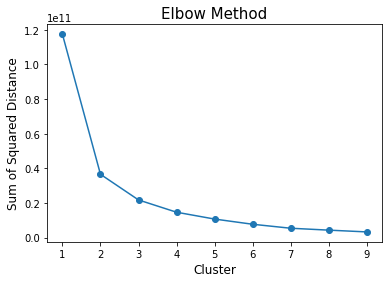

In [15]:
a = []
k = range(1,10)

for i in k :
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(data_)
    a.append(kmeans.inertia_)

plb.plot(k, a, marker='o')
plb.title('Elbow Method', fontsize = 15)
plb.xlabel('Cluster', fontsize = 12)
plb.ylabel('Sum of Squared Distance', fontsize = 12)
plb.show()

In [96]:
kmeans = KMeans(n_clusters=3, random_state=100)
kmeans.fit(data_scaled)

pds.Series(kmeans.labels_).value_counts()

print(kmeans.cluster_centers_)

[[-0.40645337 -0.03165259 -0.2244709   0.02416161 -0.25177041 -0.01716742
   0.25473362 -0.42434279 -0.35448141]
 [-0.82744866  0.64507985  0.72741122  0.19063895  1.48424268 -0.48492064
   1.07957853 -0.79187687  1.61599536]
 [ 1.36021776 -0.43753313 -0.15598401 -0.18920377 -0.68689408  0.40211078
  -1.28217981  1.36494385 -0.60424243]]


In [18]:
metrics.silhouette_score(data_scaled, kmeans.labels_)

0.28329575683463126

In [20]:
cluster_label = kmeans.fit_predict(data_scaled)

pred = kmeans.labels_
data_kmeans = pds.DataFrame(data_country)
data_kmeans['kmeans_cluster'] = pred
data_kmeans.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmeans_cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,0
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,0
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,0
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,1
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,1
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840,0


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


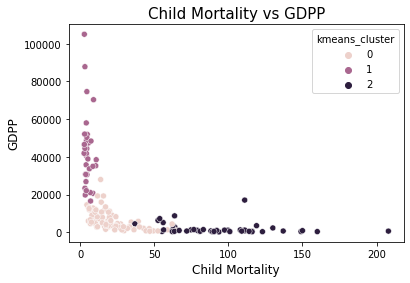

In [21]:
sbn.scatterplot(data_kmeans['child_mort'], data_kmeans['gdpp'], hue='kmeans_cluster', data=data_kmeans)
plb.title('Child Mortality vs GDPP', fontsize = 15)
plb.xlabel('Child Mortality', fontsize = 12)
plb.ylabel('GDPP', fontsize = 12)
plb.show()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


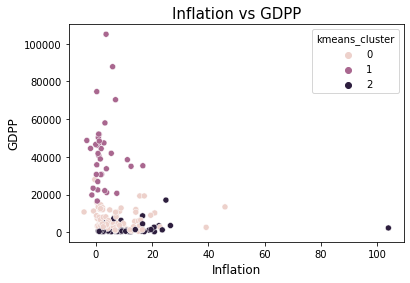

In [22]:
sbn.scatterplot(data_kmeans['inflation'], data_kmeans['gdpp'], hue='kmeans_cluster', data=data_kmeans)
plb.title('Inflation vs GDPP', fontsize = 15)
plb.xlabel('Inflation', fontsize = 12)
plb.ylabel('GDPP', fontsize = 12)
plb.show()

In [26]:
negara_miskin = data_kmeans[data_kmeans['kmeans_cluster'] == 2]['country']
negara_berkembang = data_kmeans[data_kmeans['kmeans_cluster'] == 1]['country']
negara_maju = data_kmeans[data_kmeans['kmeans_cluster'] == 0]['country']

print('Jumlah Negara Miskin', len(negara_miskin), 'Negara')
print('Jumlah Negara Berkembang', len(negara_berkembang), 'Negara')
print('Jumlah Negara Maju', len(negara_maju), 'Negara')

Jumlah Negara Miskin 47 Negara
Jumlah Negara Berkembang 36 Negara
Jumlah Negara Maju 84 Negara


In [27]:
list(negara_maju)

['Albania',
 'Algeria',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Azerbaijan',
 'Bahamas',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belize',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Brazil',
 'Bulgaria',
 'Cambodia',
 'Cape Verde',
 'Chile',
 'China',
 'Colombia',
 'Costa Rica',
 'Croatia',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Estonia',
 'Fiji',
 'Georgia',
 'Grenada',
 'Guatemala',
 'Guyana',
 'Hungary',
 'India',
 'Indonesia',
 'Iran',
 'Jamaica',
 'Jordan',
 'Kazakhstan',
 'Kyrgyz Republic',
 'Latvia',
 'Lebanon',
 'Libya',
 'Lithuania',
 'Macedonia, FYR',
 'Malaysia',
 'Maldives',
 'Mauritius',
 'Micronesia, Fed. Sts.',
 'Moldova',
 'Mongolia',
 'Montenegro',
 'Morocco',
 'Myanmar',
 'Nepal',
 'Oman',
 'Panama',
 'Paraguay',
 'Peru',
 'Philippines',
 'Poland',
 'Romania',
 'Russia',
 'Samoa',
 'Saudi Arabia',
 'Serbia',
 'Seychelles',
 'Solomon Islands',
 'Sri Lanka',
 'St. Vincent and the Grenadines',
 'Suriname',
 'Tajikistan',
 'Th

In [28]:
list(negara_berkembang)

['Australia',
 'Austria',
 'Bahrain',
 'Belgium',
 'Brunei',
 'Canada',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Iceland',
 'Ireland',
 'Israel',
 'Italy',
 'Japan',
 'Kuwait',
 'Luxembourg',
 'Malta',
 'Netherlands',
 'New Zealand',
 'Norway',
 'Portugal',
 'Qatar',
 'Singapore',
 'Slovak Republic',
 'Slovenia',
 'South Korea',
 'Spain',
 'Sweden',
 'Switzerland',
 'United Arab Emirates',
 'United Kingdom',
 'United States']

In [29]:
list(negara_miskin)

['Afghanistan',
 'Angola',
 'Benin',
 'Botswana',
 'Burkina Faso',
 'Burundi',
 'Cameroon',
 'Central African Republic',
 'Chad',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 "Cote d'Ivoire",
 'Equatorial Guinea',
 'Eritrea',
 'Gabon',
 'Gambia',
 'Ghana',
 'Guinea',
 'Guinea-Bissau',
 'Haiti',
 'Iraq',
 'Kenya',
 'Kiribati',
 'Lao',
 'Lesotho',
 'Liberia',
 'Madagascar',
 'Malawi',
 'Mali',
 'Mauritania',
 'Mozambique',
 'Namibia',
 'Niger',
 'Nigeria',
 'Pakistan',
 'Rwanda',
 'Senegal',
 'Sierra Leone',
 'South Africa',
 'Sudan',
 'Tanzania',
 'Timor-Leste',
 'Togo',
 'Uganda',
 'Yemen',
 'Zambia']

In [97]:
negara = 'Indonesia'

nilai_cluster = data_kmeans.loc[data_kmeans['country'] == negara]['kmeans_cluster']

nilai_cluster = nilai_cluster[nilai_cluster.index[0]]

if nilai_cluster == 0 :
    print(negara, 'adalah Negara Maju dengan nilai klaster', nilai_cluster)
elif(nilai_cluster == 1):
    print(negara, 'adalah Negara Berkembang dengan nilai klaster', nilai_cluster)
elif (nilai_cluster == 2): 
    print(negara, 'adalah Negara Miskin dengan nilai klaster', nilai_cluster)

Indonesia adalah Negara Maju dengan nilai klaster 0
